### 1. Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import keras
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.preprocessing import StandardScaler
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

2023-12-14 00:02:06.031265: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-14 00:02:06.031320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-14 00:02:06.032260: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-14 00:02:06.038131: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 00:02:06.655882: W tensorflow/compiler/tf2

### 2. Import Data:

In [2]:
df = pd.read_csv("./creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3. Preprocessing:

Counter({0: 284315, 1: 492})


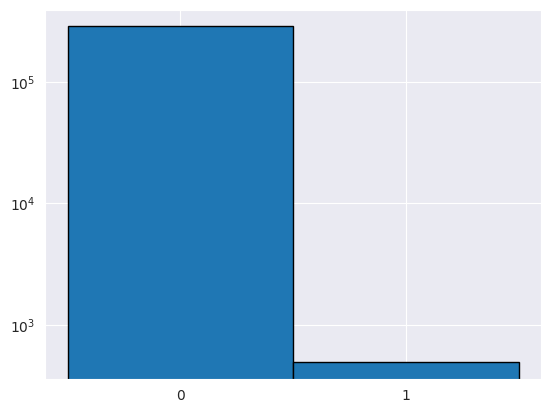

In [3]:
scaler = StandardScaler()

X = df.iloc[:, :-1]
y = df.Class.values.ravel()

X_scaled = scaler.fit_transform(X)
print(Counter(y))
plt.hist(y,bins=[-.5,.5,1.5], ec="k") 
plt.xticks((0,1))
plt.gca().set_yscale("log")
plt.show()

#### Random Oversampling

Counter({0: 284315, 1: 2843})


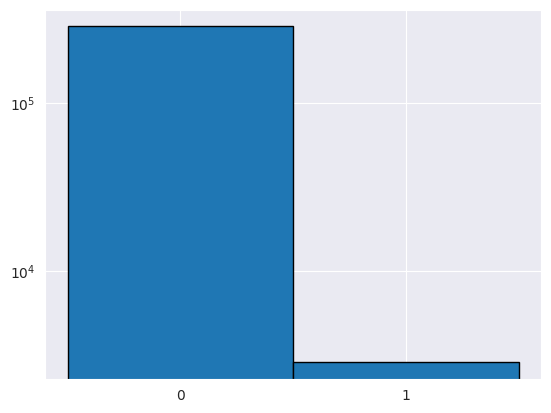

In [4]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.01)
# fit and apply the transform
X_o, y_o = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y_o))
X_scaled_o = scaler.fit_transform(X_o)
plt.hist(y_o,bins=[-.5,.5,1.5], ec="k") 
plt.xticks((0,1))
plt.gca().set_yscale("log")
plt.show()


#### Random Undersampling

Counter({0: 54666, 1: 492})


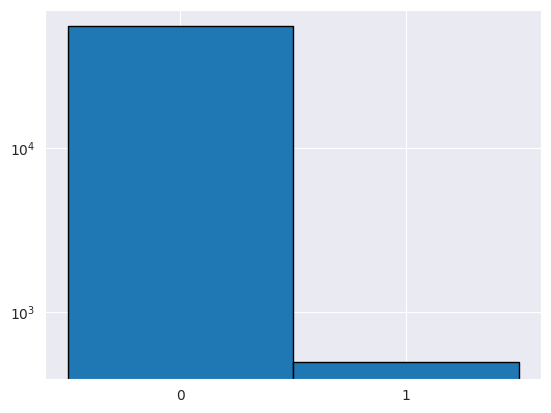

In [5]:
# define oversampling strategy
under = RandomUnderSampler(sampling_strategy=0.009)
# fit and apply the transform
X_u, y_u = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y_u))
X_scaled_u = scaler.fit_transform(X_u)
plt.hist(y_u,bins=[-.5,.5,1.5], ec="k") 
plt.xticks((0,1))
plt.gca().set_yscale("log")
plt.show()

#### Combination

Counter({0: 54666, 1: 546})


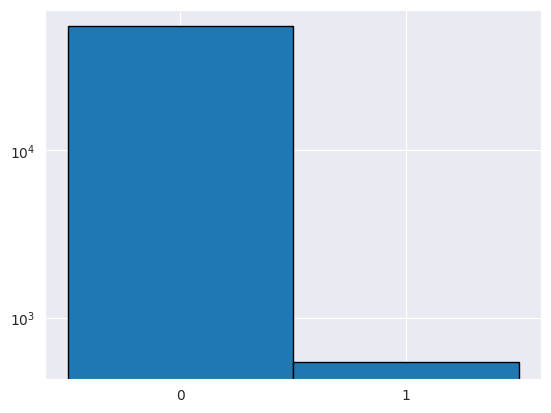

In [6]:
# define the strategy
over = RandomOverSampler(sampling_strategy=0.01)
X_c, y_c = under.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy=0.009)
X_c, y_c = over.fit_resample(X_c, y_c)
print(Counter(y_c))
X_scaled_c = scaler.fit_transform(X_c)
plt.hist(y_c,bins=[-.5,.5,1.5], ec="k") 
plt.xticks((0,1))
plt.gca().set_yscale("log")
plt.show()

### 4 . Split Training and Testing Data:

#### Baseline

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(213605, 30)
(71202, 30)
(213605,)
(71202,)


#### Oversampling

In [8]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_scaled_o, y_o, test_size = 0.25, random_state=42)

print(X_train_o.shape)
print(X_test_o.shape)
print(y_train_o.shape)
print(y_test_o.shape)

(215368, 30)
(71790, 30)
(215368,)
(71790,)


#### Undersampling

In [9]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_scaled_u, y_u, test_size = 0.25, random_state=42)

print(X_train_u.shape)
print(X_test_u.shape)
print(y_train_u.shape)
print(y_test_u.shape)

(41368, 30)
(13790, 30)
(41368,)
(13790,)


#### Combination

In [10]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled_c, y_c, test_size = 0.25, random_state=42)

print(X_train_c.shape)
print(X_test_c.shape)
print(y_train_c.shape)
print(y_test_c.shape)

(41409, 30)
(13803, 30)
(41409,)
(13803,)


### Convolutional Neural Networks

In [11]:
X_train.shape[-1]
X_test_d = np.expand_dims(X_test, -1)
X_train_d  = np.expand_dims(X_train, -1)

In [12]:
def create_model():
    model_3 = Sequential()
    model_3.add(Conv1D(32, 2, activation='relu', input_shape=X_test_d[0].shape))
    model_3.add(BatchNormalization())
    model_3.add(Dropout(0.1))

    model_3.add(Conv1D(64, 2, activation='relu'))
    model_3.add(BatchNormalization())
    model_3.add(Dropout(0.2))

    model_3.add(Conv1D(128, 2, activation='relu'))
    model_3.add(BatchNormalization())
    model_3.add(Dropout(0.3))

    model_3.add(Flatten())
    model_3.add(Dropout(0.4))
    model_3.add(Dense(512, activation='relu'))
    model_3.add(Dropout(0.5))

    model_3.add(Dense(1, activation='sigmoid'))
    
    METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

    model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

    return model_3

#### Baseline Model

In [13]:
# Create a base model instance
model_b = create_model()

# Display the model's architecture
model_b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

2023-12-14 00:02:57.838223: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-14 00:02:57.908560: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-14 00:02:57.908622: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-14 00:02:57.911720: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-14 00:02:57.911779: I external/local_xla/xla/stream_executor

Total params: 1792161 (6.84 MB)
Trainable params: 1791713 (6.83 MB)
Non-trainable params: 448 (1.75 KB)
_________________________________________________________________


In [ ]:
METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]


history = model_b.fit(X_train_d, y_train, 
              validation_split=0.2,
              batch_size=16, 
              epochs=20, 
             )

In [22]:
# Save history
np.save('./ml/checkpoints/baseline/ml',history.history)
# Save the weights
model_b.save_weights('./ml/checkpoints/baseline/ml')

In [14]:
#Load saved model
model_b.load_weights('./checkpoints/baseline/ml')

history=np.load('./checkpoints/baseline/ml.npy',allow_pickle='TRUE').item()

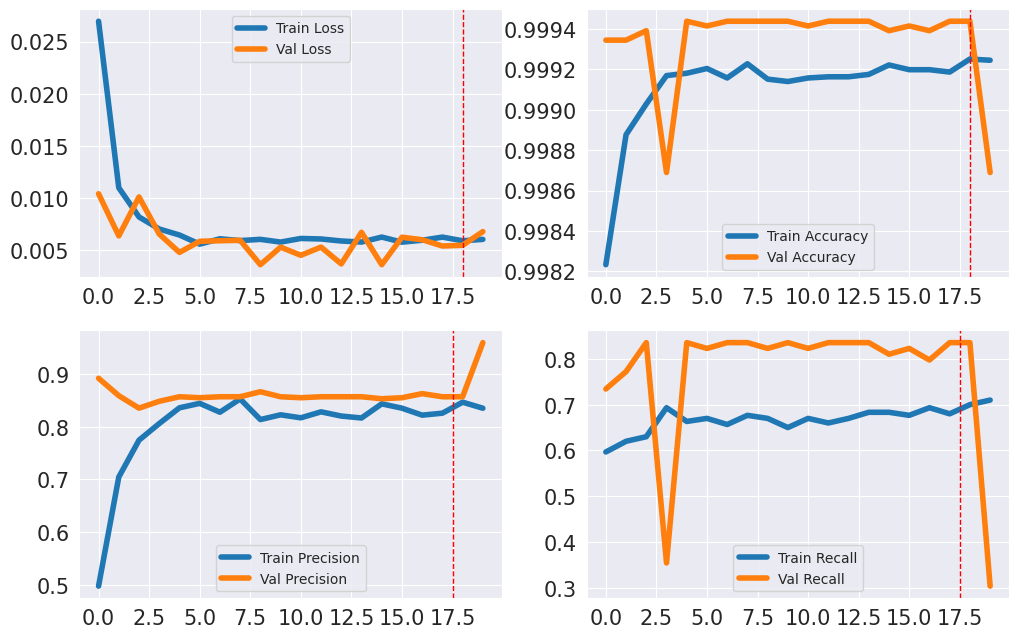

In [15]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history['loss'], label='Train Loss', linewidth=4)
plt.plot(history['val_loss'], label='Val Loss', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy', linewidth=4)
plt.plot(history['val_accuracy'], label='Val Accuracy', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 3)
plt.plot(history['precision'], label='Train Precision', linewidth=4)
plt.plot(history['val_precision'], label='Val Precision', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)

plt.subplot(4, 2, 4)
plt.plot(history['recall'], label='Train Recall', linewidth=4)
plt.plot(history['val_recall'], label='Val Recall', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)


#### Oversampled Dataset

In [16]:
X_test_do = np.expand_dims(X_test_o, -1)
X_train_do  = np.expand_dims(X_train_o, -1)

In [17]:
# Create a base model instance
model_o = create_model()

# Display the model's architecture
model_o.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_3 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_4 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 28, 64)           

In [ ]:
METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]


history_o = model_o.fit(X_train_do, y_train_o, 
              validation_split=0.2,
              batch_size=16, 
              epochs=20, 
             )

In [31]:
# Save history
np.save('./ml/checkpoints/oversample/ml',history_o.history)
# Save the weights
model_o.save_weights('./ml/checkpoints/oversample/ml')

In [18]:
#Load saved model
model_o.load_weights('./checkpoints/oversample/ml')

history=np.load('./checkpoints/oversample/ml.npy',allow_pickle='TRUE').item()

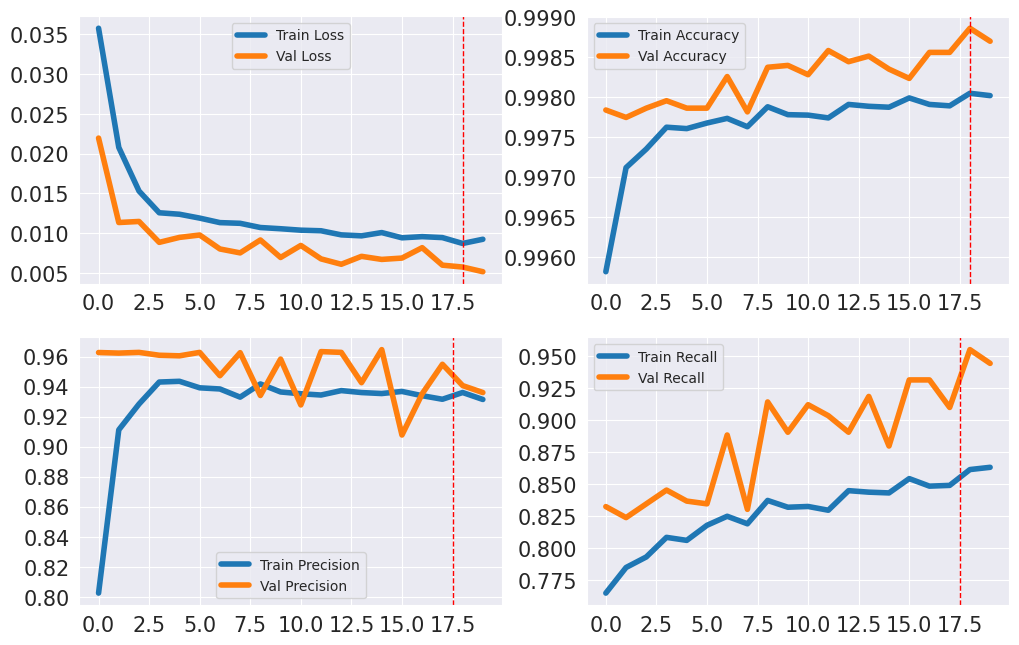

In [19]:

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history['loss'], label='Train Loss', linewidth=4)
plt.plot(history['val_loss'], label='Val Loss', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy', linewidth=4)
plt.plot(history['val_accuracy'], label='Val Accuracy', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 3)
plt.plot(history['precision'], label='Train Precision', linewidth=4)
plt.plot(history['val_precision'], label='Val Precision', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)

plt.subplot(4, 2, 4)
plt.plot(history['recall'], label='Train Recall', linewidth=4)
plt.plot(history['val_recall'], label='Val Recall', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)


#### UnderSampled Dataset

In [20]:
X_test_du = np.expand_dims(X_test_u, -1)
X_train_du  = np.expand_dims(X_train_u, -1)

In [21]:
# Create a base model instance
model_u = create_model()

# Display the model's architecture
model_u.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_6 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_7 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 28, 64)           

In [ ]:
METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]


history_u = model_u.fit(X_train_du, y_train_u, 
              validation_split=0.2,
              batch_size=16, 
              epochs=20, 
             )

In [29]:
# Save history
np.save('./ml/checkpoints/undersample/ml',history_u.history)
# Save the weights
model_u.save_weights('./ml/checkpoints/undersample/ml')

In [22]:
#Load saved model
model_u.load_weights('./checkpoints/undersample/ml')

history=np.load('./checkpoints/undersample/ml.npy',allow_pickle='TRUE').item()

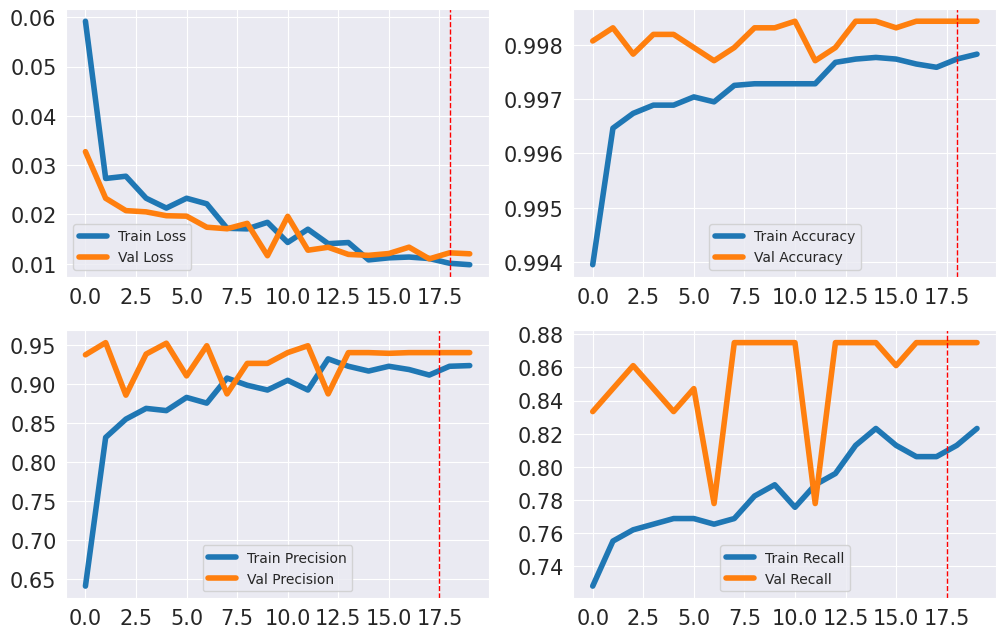

In [23]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history['loss'], label='Train Loss', linewidth=4)
plt.plot(history['val_loss'], label='Val Loss', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy', linewidth=4)
plt.plot(history['val_accuracy'], label='Val Accuracy', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 3)
plt.plot(history['precision'], label='Train Precision', linewidth=4)
plt.plot(history['val_precision'], label='Val Precision', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)

plt.subplot(4, 2, 4)
plt.plot(history['recall'], label='Train Recall', linewidth=4)
plt.plot(history['val_recall'], label='Val Recall', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)


#### Combination

In [24]:
X_test_dc = np.expand_dims(X_test_c, -1)
X_train_dc  = np.expand_dims(X_train_c, -1)

In [25]:
# Create a base model instance
model_c = create_model()

# Display the model's architecture
model_c.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_9 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_10 (Ba  (None, 28, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 28, 64)           

In [ ]:
METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]


history_c = model_c.fit(X_train_dc, y_train_c, 
              validation_split=0.2,
              batch_size=16, 
              epochs=20, 
             )

In [210]:
# Save history
np.save('./ml/checkpoints/combination/checkpoint',history_u.history)
# Save the weights
model_u.save_weights('./ml/checkpoints/combination/checkpoint')

In [26]:
#Load saved model
model_c.load_weights('./checkpoints/combination/checkpoint')

history=np.load('./checkpoints/combination/checkpoint.npy',allow_pickle='TRUE').item()

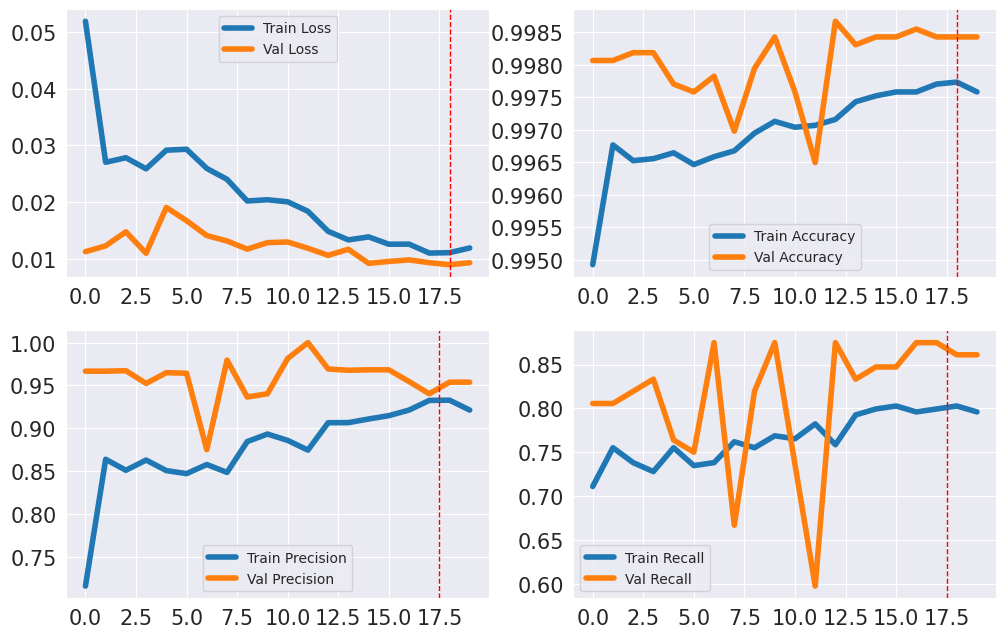

In [27]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history['loss'], label='Train Loss', linewidth=4)
plt.plot(history['val_loss'], label='Val Loss', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy', linewidth=4)
plt.plot(history['val_accuracy'], label='Val Accuracy', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 3)
plt.plot(history['precision'], label='Train Precision', linewidth=4)
plt.plot(history['val_precision'], label='Val Precision', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)

plt.subplot(4, 2, 4)
plt.plot(history['recall'], label='Train Recall', linewidth=4)
plt.plot(history['val_recall'], label='Val Recall', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)


### Results

In [28]:
pred_b = model_b.predict(X_test_d)
pred_u = model_u.predict(X_test_d)
pred_o = model_o.predict(X_test_d)
pred_c = model_c.predict(X_test_d)

2023-12-14 00:05:42.851202: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-14 00:05:42.883801: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-14 00:05:42.961004: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


2226/2226 [==============================] - 4s 2ms/step


In [29]:
y_pred_b = np.where(pred_b >= 0.5, 1, 0)
y_pred_b= y_pred_b.flatten()

y_pred_o = np.where(pred_o >= 0.5, 1, 0)
y_pred_o= y_pred_o.flatten()

y_pred_u = np.where(pred_u >= 0.5, 1, 0)
y_pred_u= y_pred_u.flatten()

y_pred_c = np.where(pred_c >= 0.5, 1, 0)
y_pred_c= y_pred_c.flatten()

#### F2 Score

In [30]:
# perfect precision, 50% recall
p = precision_score(y_test, y_pred_b)
r = recall_score(y_test, y_pred_b)
f = fbeta_score(y_test, y_pred_b, beta=2.0)
p1 = precision_score(y_test, y_pred_o)
r1 = recall_score(y_test, y_pred_o)
f1 = fbeta_score(y_test, y_pred_o, beta=2.0)
p2 = precision_score(y_test, y_pred_u)
r2 = recall_score(y_test, y_pred_u)
f2 = fbeta_score(y_test, y_pred_u, beta=2.0)
p3 = precision_score(y_test, y_pred_c)
r3 = recall_score(y_test, y_pred_c)
f3 = fbeta_score(y_test, y_pred_c, beta=2.0)
# Create a DataFrame
df = pd.DataFrame({
    'Precision Score': [p, p1,p2,p3],
    'Recall Score': [r, r1, r2,r3],
    'F2 Score': [f, f1,f2,f3]
})

# Set row names (index)
df.index = ['Baseline', 'Oversampled','Undersampled','Combination']

# Display the DataFrame
df

,Precision Score,Recall Score,F2 Score
Baseline,0.968750,0.274336,0.320248
Oversampled,0.610465,0.929204,0.841346
Undersampled,0.740741,0.884956,0.851789
Combination,0.633987,0.858407,0.801653


#### AUC Score

In [31]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_b[:,0])
auc_score2 = roc_auc_score(y_test, pred_u[:,0])
auc_score3 = roc_auc_score(y_test, pred_o[:,0])
auc_score4 = roc_auc_score(y_test, pred_c[:,0])

print('The AUC score for the baseline dataset: ',auc_score1)
print('The AUC score for the Undersampled dataset: ',auc_score2)
print('The AUC score for the Oversampled dataset: ',auc_score3)
print('The AUC score for the Combination dataset: ',auc_score4)

The AUC score for the baseline dataset:  0.9879758104542268
The AUC score for the Undersampled dataset:  0.998235416479679
The AUC score for the Oversampled dataset:  0.9992606799628088
The AUC score for the Combination dataset:  0.9944743327477945


#### ROC Curve

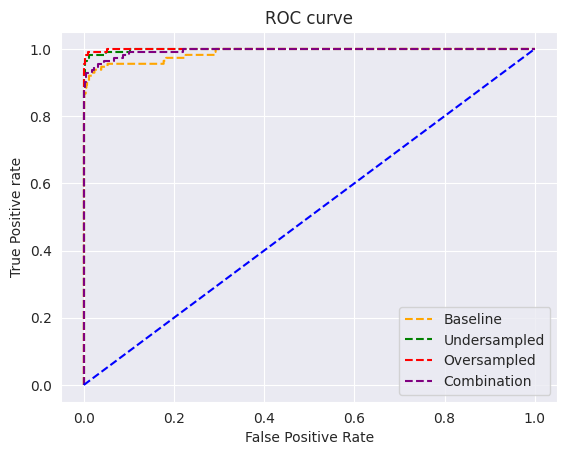

In [32]:
# fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_o)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_b[:,0])
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_u[:,0])
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_o[:,0])
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_c[:,0])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Baseline')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Undersampled')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Oversampled')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Combination')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

#### Confusion Matrix

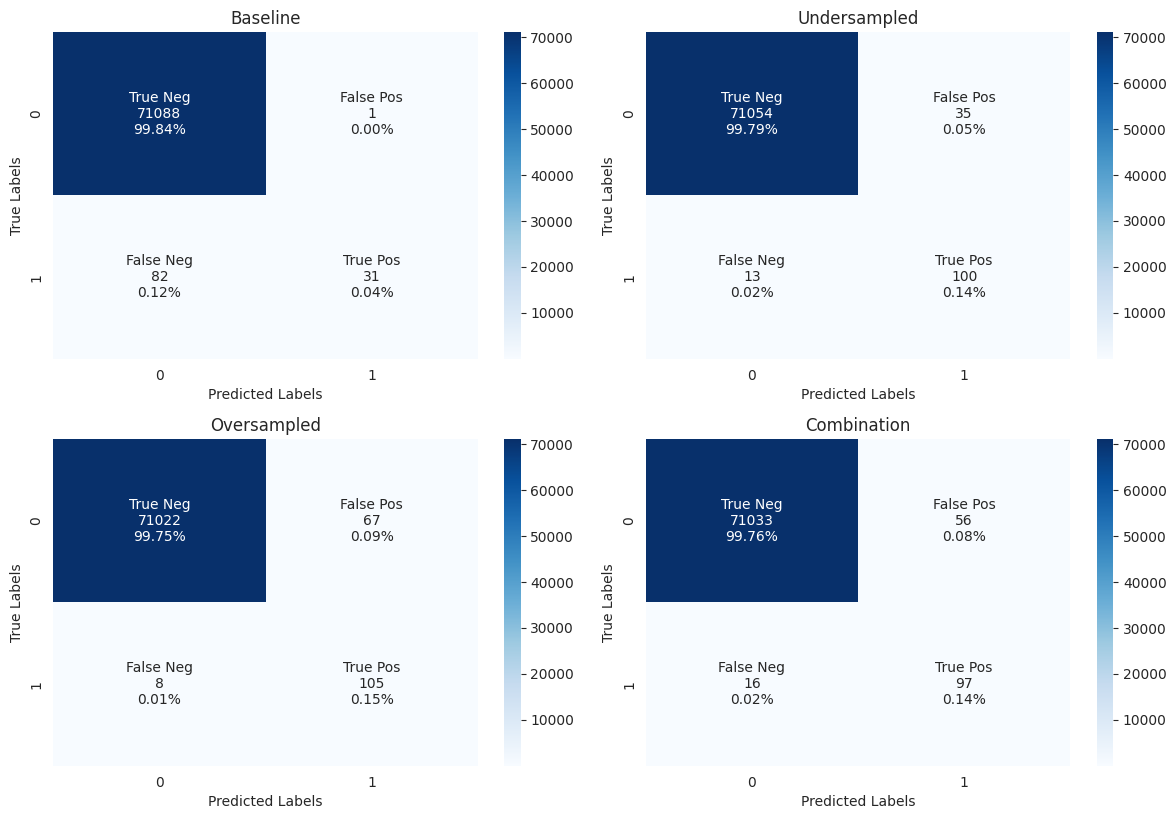

In [33]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
cmb = confusion_matrix(y_test, y_pred_b)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cmb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cmb.flatten()/np.sum(cmb)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cmb, annot=labels, fmt='', cmap='Blues')
ax.set_title("Baseline")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

plt.subplot(4, 2, 2)
cm = confusion_matrix(y_test, y_pred_u)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title("Undersampled")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

plt.subplot(4, 2, 3)
cm1 = confusion_matrix(y_test, y_pred_o)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')
ax.set_title("Oversampled")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

plt.subplot(4, 2, 4)
cm3 = confusion_matrix(y_test, y_pred_c)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm3.flatten()/np.sum(cm3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cm3, annot=labels, fmt='', cmap='Blues')
ax.set_title("Combination")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.tight_layout()